## Victor Rene Pérez Mayen
### 19005180
#### Tarea 1: Aprendizaje no supervisado

In [5]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

In [6]:
def mostrar_digito(digito):
    digito = digito.reshape(8, 8)

    plt.imshow(digito, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.show()

# Cargando los Datos (MNIST)

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()

x = digits.data
x.shape

(1797, 64)

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

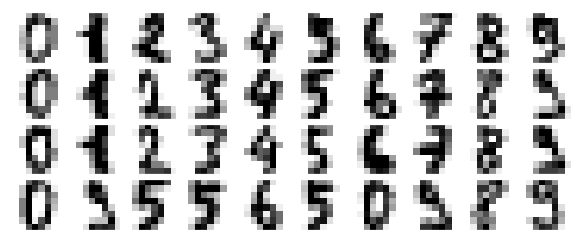

In [9]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

In [12]:
x1 = x/255 #normalizamos
x1[:2]

array([[0.        , 0.        , 0.01960784, 0.05098039, 0.03529412,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.05098039, 0.05882353, 0.03921569, 0.05882353, 0.01960784,
        0.        , 0.        , 0.01176471, 0.05882353, 0.00784314,
        0.        , 0.04313725, 0.03137255, 0.        , 0.        ,
        0.01568627, 0.04705882, 0.        , 0.        , 0.03137255,
        0.03137255, 0.        , 0.        , 0.01960784, 0.03137255,
        0.        , 0.        , 0.03529412, 0.03137255, 0.        ,
        0.        , 0.01568627, 0.04313725, 0.        , 0.00392157,
        0.04705882, 0.02745098, 0.        , 0.        , 0.00784314,
        0.05490196, 0.01960784, 0.03921569, 0.04705882, 0.        ,
        0.        , 0.        , 0.        , 0.02352941, 0.05098039,
        0.03921569, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.04705882, 0.05098039,
        0.01960784, 0.        , 0.        , 0.        , 0. 

In [15]:
#### PCA a 2 dimensiones ######
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

X2D = principalComponents#new features matrix

In [16]:
print(x.shape)
print(X2D.shape)

(1797, 64)
(1797, 2)


Text(0, 0.5, 'component 2')

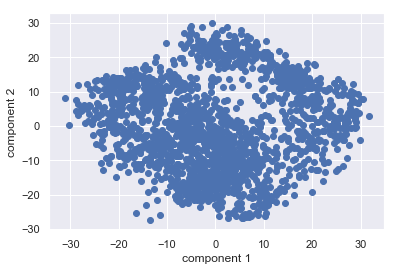

In [17]:
plt.scatter(X2D[:, 0], X2D[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')


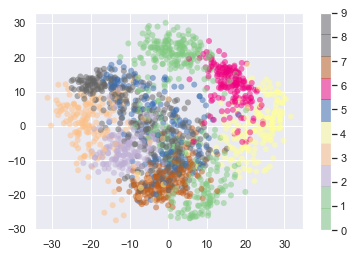

In [18]:
plt.scatter(X2D[:, 0], X2D[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar()

## K-means Clustering con Sklearn

[Documentacion oficial](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [20]:
## K-means
kmeans = KMeans(n_clusters=10, random_state=0).fit(X2D)
kmeans.labels_

array([0, 7, 9, ..., 9, 1, 2])

In [28]:
clusters = kmeans.predict(X2D) # clustes de kmeans

In [29]:
kmeans.predict(X2D)

array([0, 7, 9, ..., 9, 1, 2])

In [30]:
kmeans.cluster_centers_.shape

(10, 2)

In [31]:
centers = kmeans.cluster_centers_

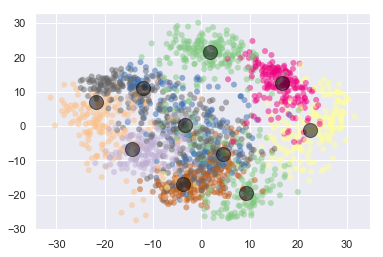

In [32]:
plt.scatter(X2D[:, 0], X2D[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
